### Preliminary overview

This notebook uses the data from the runs of biogeochemical model adjusted for the Wadden Sea.

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import xarray as xr
import seaborn as sns
sns.set()
register_matplotlib_converters()

#### Check alkalinity in the surface layer

In [2]:
ds = xr.open_dataset('data/base/water.nc')
alk_df = ds['B_C_Alk'].to_dataframe()
alk_surface = alk_df.groupby('z').get_group(1.250)
alk = alk_surface.loc['2011-01-01':'2011-12-31']

In [3]:
ds = xr.open_dataset('data/with_alk/water.nc')
alk_df = ds['B_C_Alk'].to_dataframe()
alk_surface = alk_df.groupby('z').get_group(1.250)
alk_with_flux = alk_surface.loc['2011-01-01':'2011-12-31']

In [4]:
alk = alk.reset_index(); alk_with_flux = alk_with_flux.reset_index()

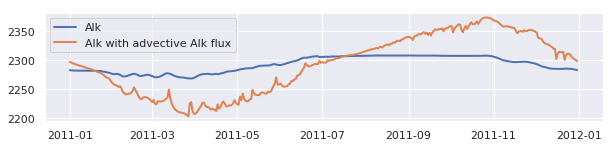

In [5]:
fig = plt.figure(figsize=(10, 2)); ax = fig.add_subplot(1, 1, 1);
ax.plot(alk['time'], alk['B_C_Alk'], linewidth=2, label=r'Alk');
ax.plot(alk_with_flux['time'], alk_with_flux['B_C_Alk'], linewidth=2, label=r'Alk with advective Alk flux');
ax.legend(loc='upper left');

#### Check surface fluxes of CO$_2$

In [6]:
ds = xr.open_dataset('data/base/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_no = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [7]:
ds = xr.open_dataset('data/with_alk/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_alk = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [8]:
#ds = xr.open_dataset('data/with_so4_dic/water.nc')
#dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
#dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
#dicflux_so4_dic = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [9]:
dicflux_no = dicflux_no.reset_index(); dicflux_alk = dicflux_alk.reset_index(); #dicflux_so4_dic = dicflux_so4_dic.reset_index();

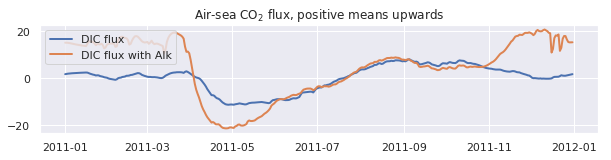

In [10]:
fig = plt.figure(figsize=(10, 2)); ax = fig.add_subplot(1, 1, 1);
ax.plot(dicflux_no['time'], dicflux_no['B_C_DIC   _flux'], linewidth=2, label=r'DIC flux');
ax.plot(dicflux_alk['time'], dicflux_alk['B_C_DIC   _flux'], linewidth=2, label=r'DIC flux with Alk');
#ax.plot(dicflux_so4_dic['time'], dicflux_so4_dic['B_C_DIC   _flux'], linewidth=2, label=r'DIC flux so4+dic');
plt.title('Air-sea CO$_2$ flux, positive means upwards');
ax.legend(loc='upper left');